In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
auto_mpg = pd.read_csv('auto-mpg.csv')

# Display the first few rows of the dataset
print(auto_mpg.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [2]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
auto_mpg["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [4]:
auto_mpg = auto_mpg[auto_mpg.horsepower != '?'].copy() 
auto_mpg['horsepower']=pd.to_numeric(auto_mpg['horsepower'])

In [5]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [6]:
a = auto_mpg.describe()
a.loc['range'] = a.loc['max'] - a.loc['min']
a.loc['range']

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
model year        12.0
origin             2.0
Name: range, dtype: float64

In [7]:
a.loc[['mean','std', 'range']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
range,37.600000,5.000000,387.000000,184.000000,3527.000000,16.800000,12.000000,2.000000


In [8]:
df_b =auto_mpg.drop(auto_mpg.index[10:85])
b = df_b.describe()
b.loc['range'] = b.loc['max'] - b.loc['min']
b.loc[['mean','std', 'range']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308
range,35.600000,5.000000,387.000000,184.000000,3348.000000,16.300000,12.000000,2.000000


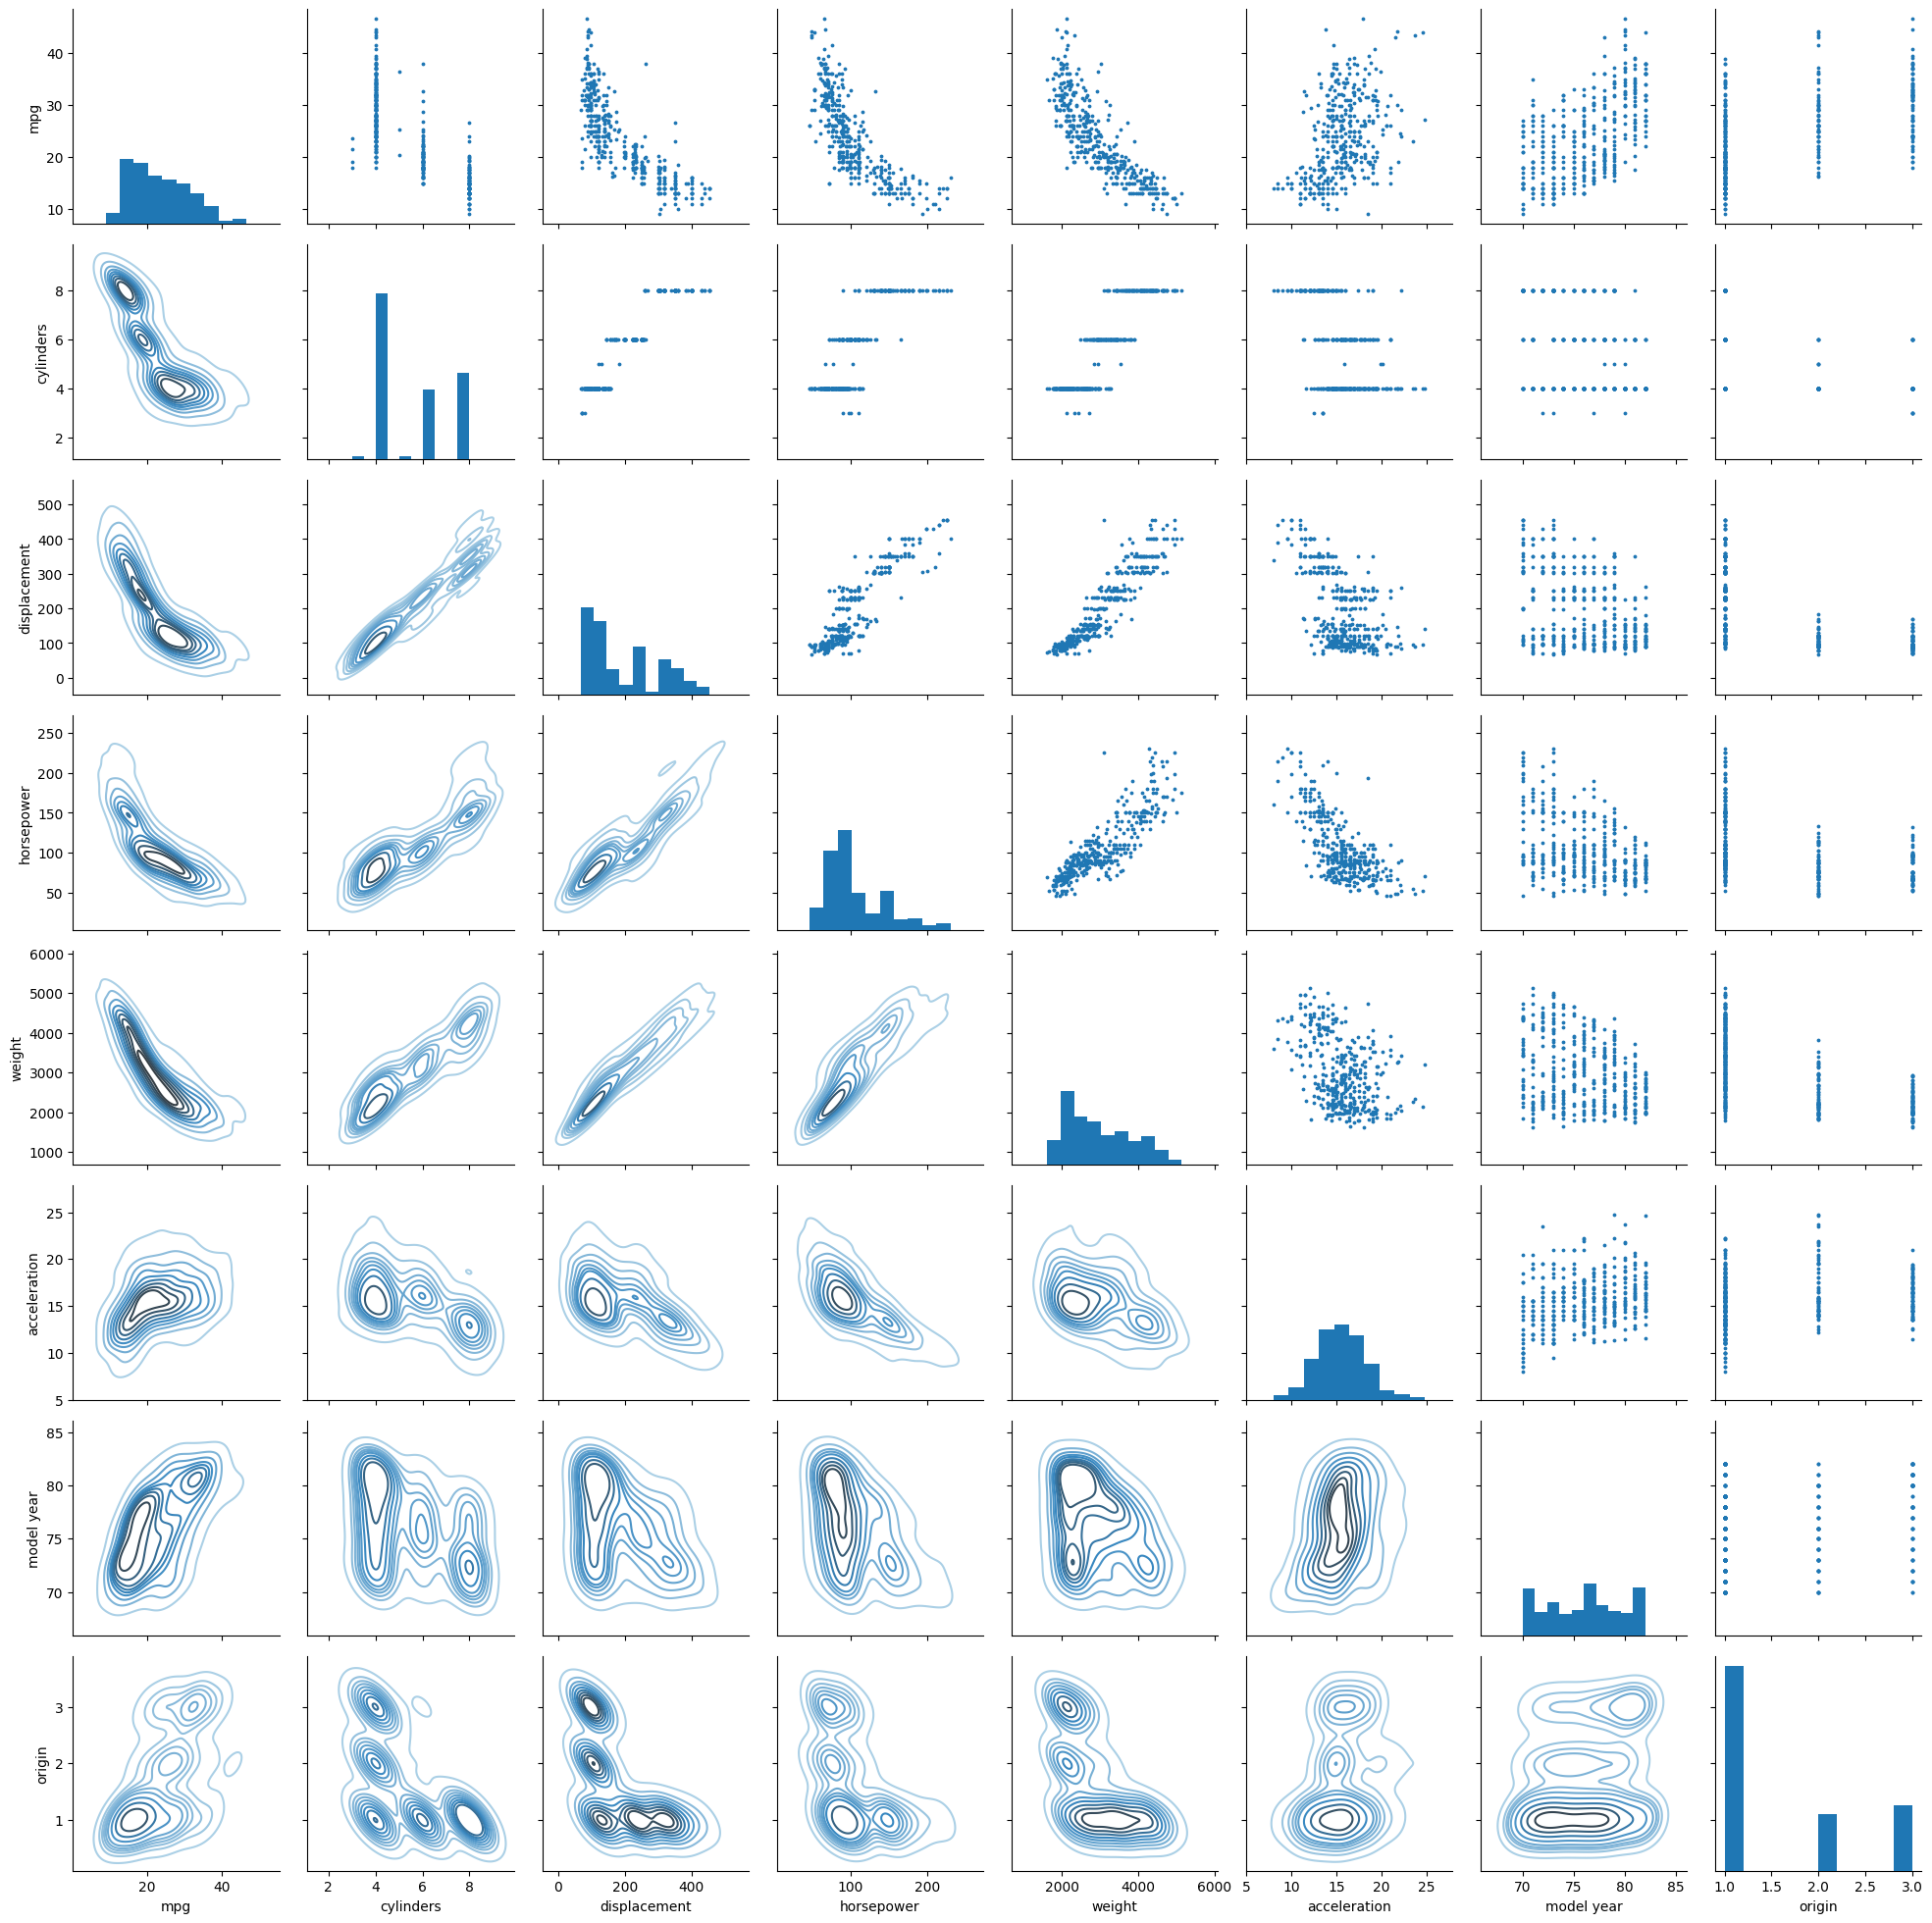

In [9]:
g = sns.PairGrid(auto_mpg)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
#g.fig.set_size_inches(12, 12)

## Simple Linear Regression

In [10]:
# prepare data for modelling (training set)
X_train = auto_mpg['horsepower'] # horsepower as predictor
y_train = auto_mpg['mpg']        # mpg as response

In [11]:
X_train.head() # just to check

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: int64

In [12]:
y_train.head() # just to check

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [13]:
X_train.unique() # check for data quality (missing data, errors, etc.)

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

In [14]:
y_train.unique() # check for data quality (missing data, errors, etc.)

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [15]:
# create dataframe to use statsmodel
d = {'horsepower':X_train.astype('float'), 'mpg':y_train}
df = pd.DataFrame(data=d)
df.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


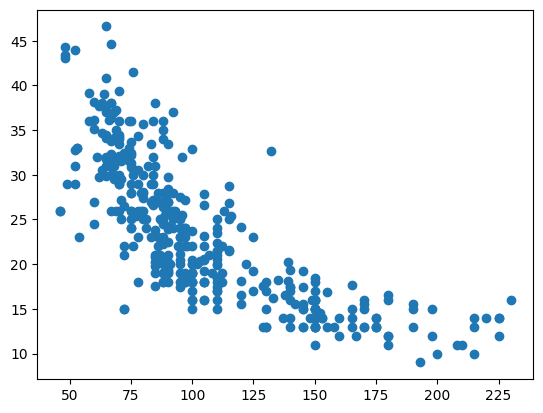

In [16]:
# plot
plt.scatter(X_train,y_train)

In [17]:
import statsmodels.formula.api as smf 
# using statsmodel for linear regression (http://statsmodels.sourceforge.net/)
mod = smf.ols(formula='mpg ~ horsepower', data = df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           7.03e-81
Time:                        23:53:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

There is a relationship between the predictor and the response. We can reject the null hypothesis that the regression coefficients are zero, since the F-statistic is much larger than 1 and the p-value is close to zero.

Since the R-squared value is just about 0.606, we can say that approximately 60% of the variance in mpg is explained by horsepower.

The relationship is negative because the coefficient corresponding to horsepower is equal to -0.1578.

In [18]:
# Define the horsepower value for prediction
hp_value = 98

# Create a DataFrame for the new data point
new_data = pd.DataFrame({'horsepower': [hp_value]})

# Get the prediction with confidence and prediction intervals
predicted_mpg = res.get_prediction(new_data)
summary_frame = predicted_mpg.summary_frame(alpha=0.05)  # 95% intervals

# Extract the prediction and intervals
mean_pred = summary_frame['mean'][0]  # Predicted mean (expected mpg)
conf_int_low, conf_int_high = summary_frame['mean_ci_lower'][0], summary_frame['mean_ci_upper'][0]
pred_int_low, pred_int_high = summary_frame['obs_ci_lower'][0], summary_frame['obs_ci_upper'][0]

print(f"Predicted mpg for horsepower of {hp_value}: {mean_pred:.2f}")
print(f"95% Confidence Interval for the mean: ({conf_int_low:.2f}, {conf_int_high:.2f})")
print(f"95% Prediction Interval for an individual car: ({pred_int_low:.2f}, {pred_int_high:.2f})")

Predicted mpg for horsepower of 98: 24.47
95% Confidence Interval for the mean: (23.97, 24.96)
95% Prediction Interval for an individual car: (14.81, 34.12)


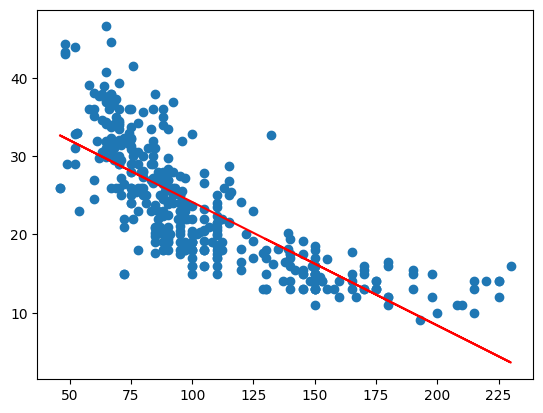

In [19]:
plt.subplots(1,1) #to get both plots in the same figure 
plt.scatter(X_train.astype('float'), y_train);
plt.plot(X_train.astype('float'), res.fittedvalues, color='red')

In [20]:
import numpy as np
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# fitted values (need a constant term for intercept)
model_fitted_y = res.fittedvalues

# model residuals
model_residuals = res.resid

# normalized residuals
model_norm_residuals = res.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = res.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = res.get_influence().cooks_distance[0]


C:\Users\BIBER\AppData\Local\Temp\ipykernel_4892\2243140512.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # pretty matplotlib plots


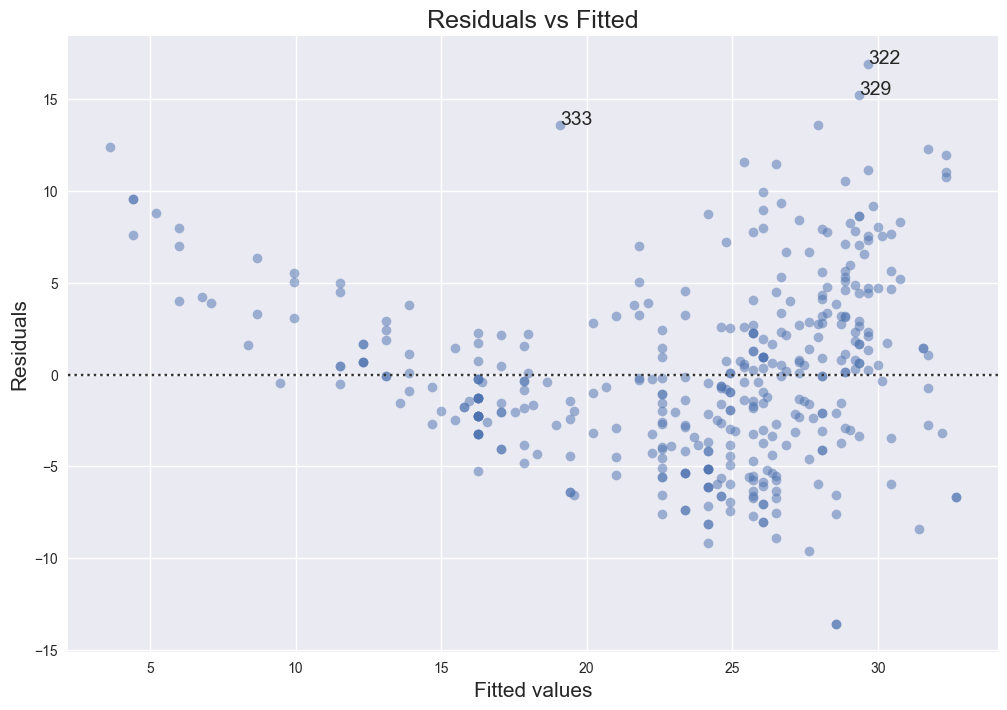

In [21]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y=df['mpg'],
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})



plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]))

We can clearly see a strong non-linearity.The funnel shape of the plotted residuals indicates that we are in the presence of heteroscedasticity.

c:\Users\BIBER\Desktop\Projects\statistics\stats\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


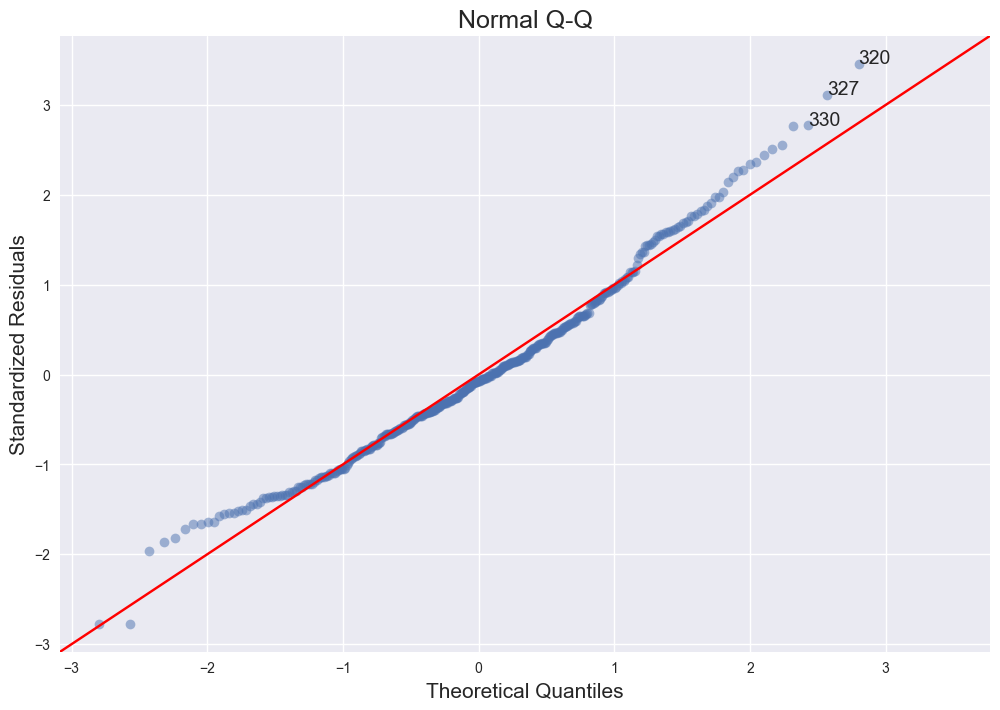

In [22]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

The qq-plot indicates that the assumption of normality does hold, since we can fit a straight line quite well, although there seems to be a slight left skew.

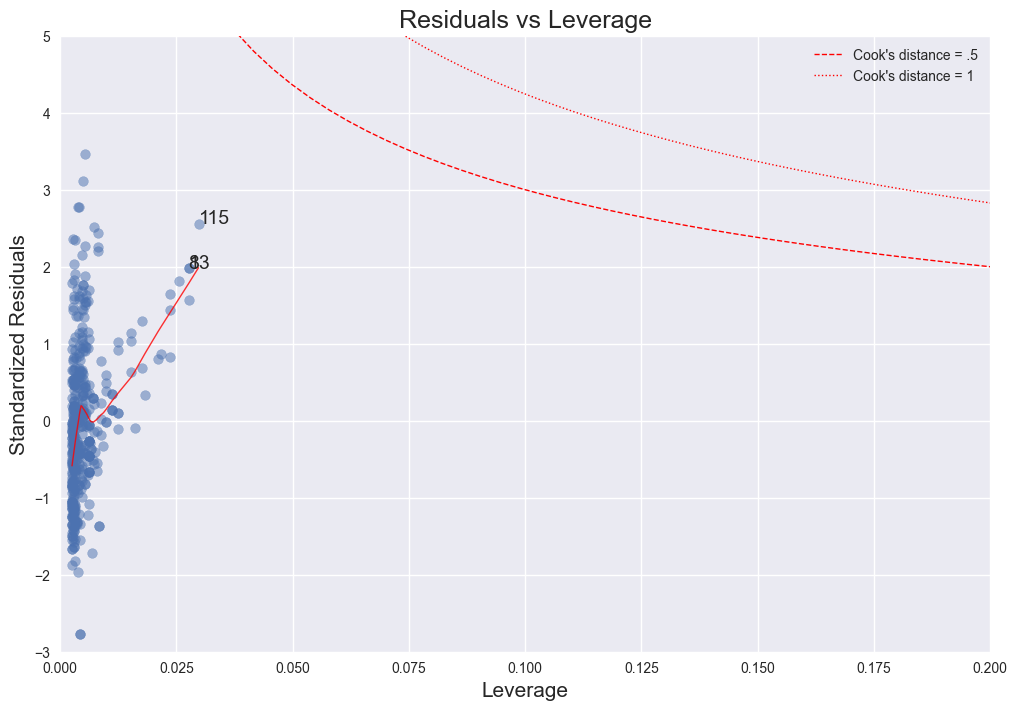

In [23]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(x=model_leverage, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(res.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right')

The higher leverage points concentrate on the upper half of this plot, which indicates a deviation from normality. On the other hand, from the plot we can see that every point has a Cook's distance well below 1, which indicates that no point has much individual influence on the fit.

"This plot is of "Cook's distance", which is a measure of the influence of each observation on the regression coefficients. The Cook's distance statistic is a measure, for each observation in turn, of the extent of change in model estimates when that particular observation is omitted. Any observation for which the Cook's distance is close to 1 or more, or that is substantially larger than other Cook's distances (highly influential data points), requires investigation."

## Multiple Linear Regression

In [24]:
sns.set(style="white")
plt.style.use('seaborn-white')

C:\Users\BIBER\AppData\Local\Temp\ipykernel_4892\121063470.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [25]:
auto_mpg = auto_mpg.set_index("car name")

In [26]:
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [27]:
auto_mpg = auto_mpg.rename(columns={"model year": "year"})

In [28]:
auto_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


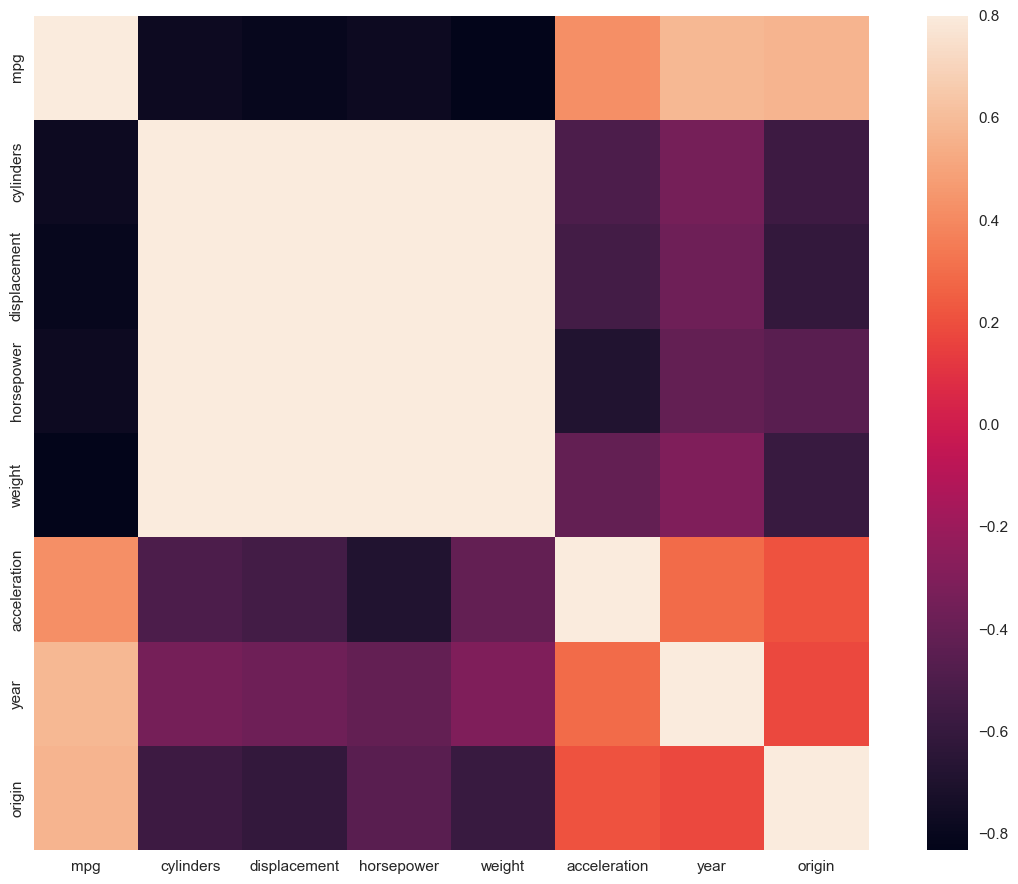

In [29]:
corrmat = auto_mpg.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

In [30]:
reg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', auto_mpg).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          2.04e-139
Time:                        23:53:23   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a relationship between the predictors and the response. In the table above we can see that the value of the F-statistic is 252 which is much larger than 1, so we can reject the corresponding null hypothesis 
$$
H_0 : \beta_{cylinders} = \beta_{displacement} = \beta_{weight} = \beta_{acceleration} = \beta_{year} = \beta_{origin} = 0.
$$

In fact, the p value of F is really low.

The predictors with largest statistical significance are: * displacement * weight * year * origin

The coefficient for the year suggests a positive relationship between the year and mpg. This can be interpreted as more recently made cars have a high mpg. This is as we expect as newer cars are designed to be more efficient.

In [33]:
model_f = 'mpg ~ cylinders + \
                 displacement + \
                 horsepower + \
                 weight + \
                 acceleration + \
                 year + \
                 origin'

model = smf.ols(formula=model_f, data=auto_mpg)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


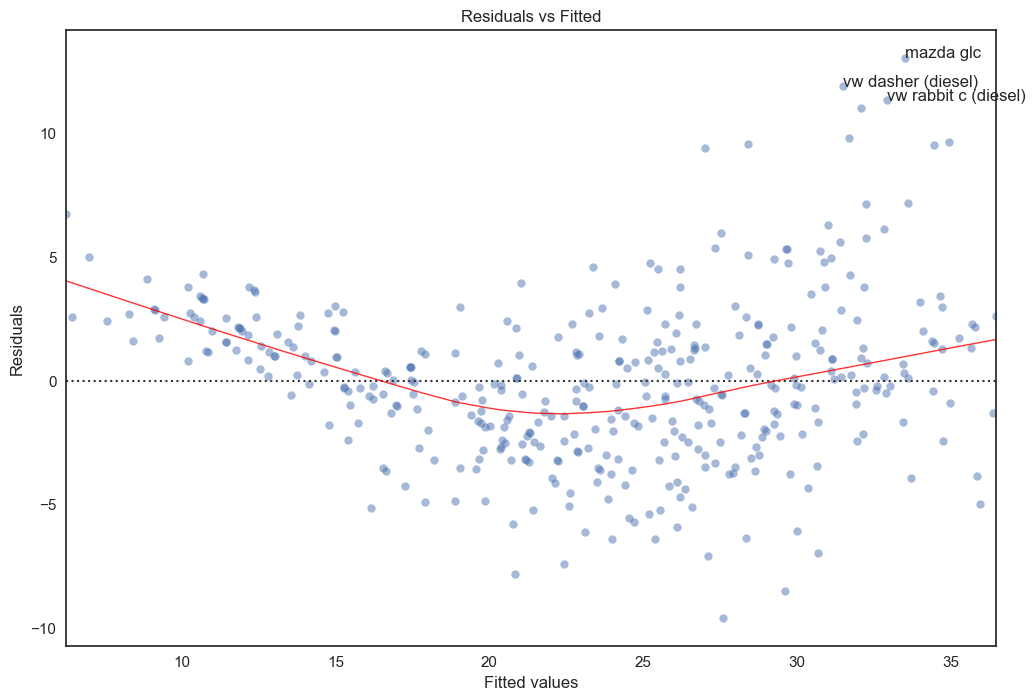

In [37]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y='mpg', data=auto_mpg,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]))

c:\Users\BIBER\Desktop\Projects\statistics\stats\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


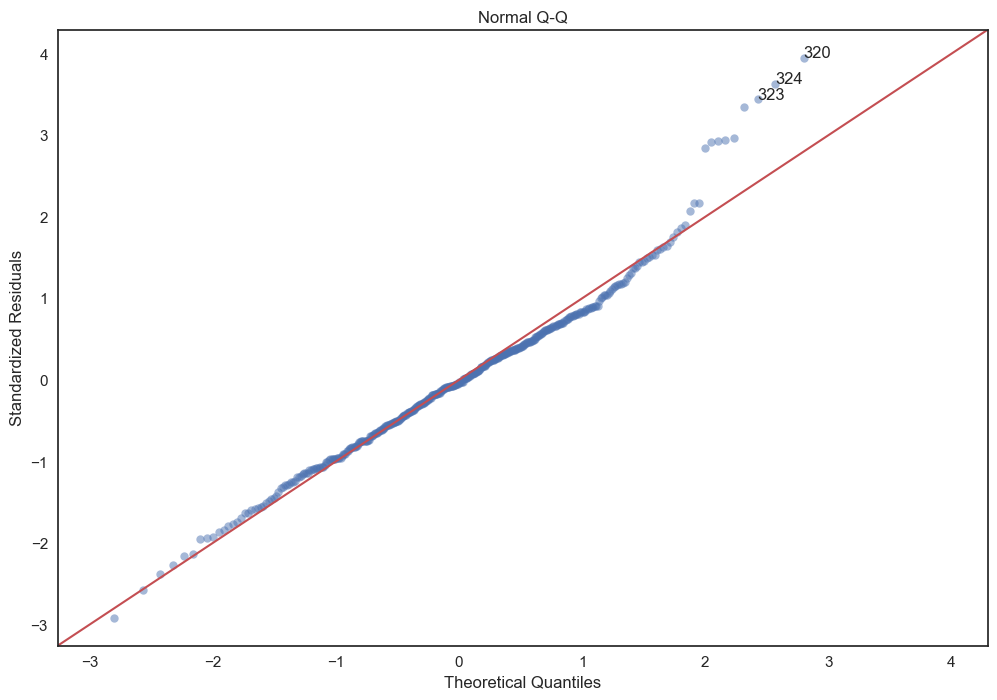

In [38]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

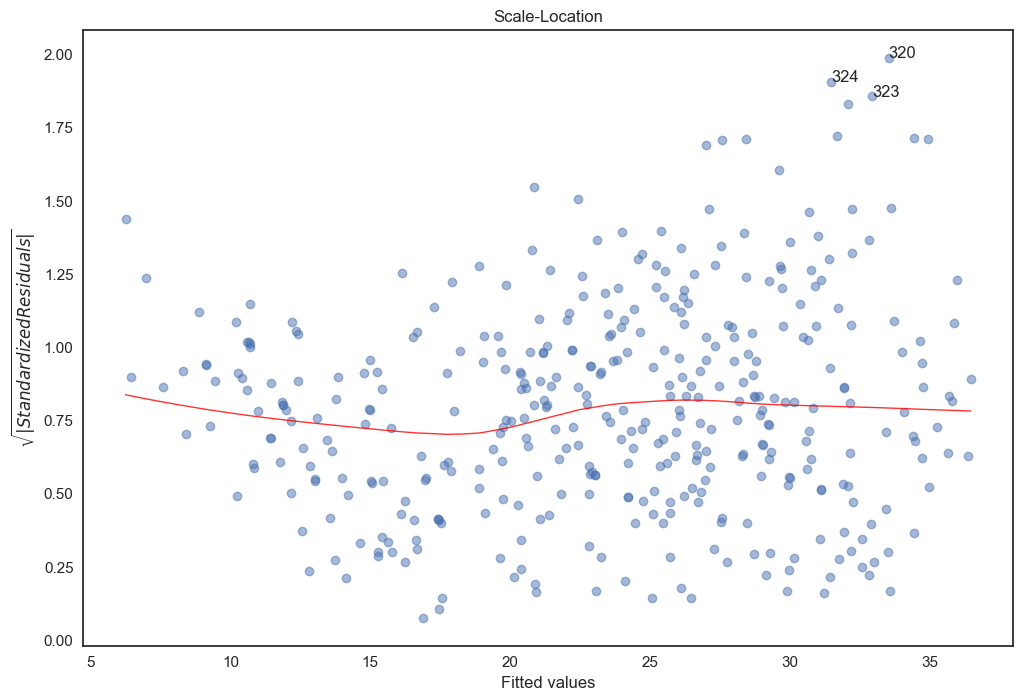

In [40]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]))

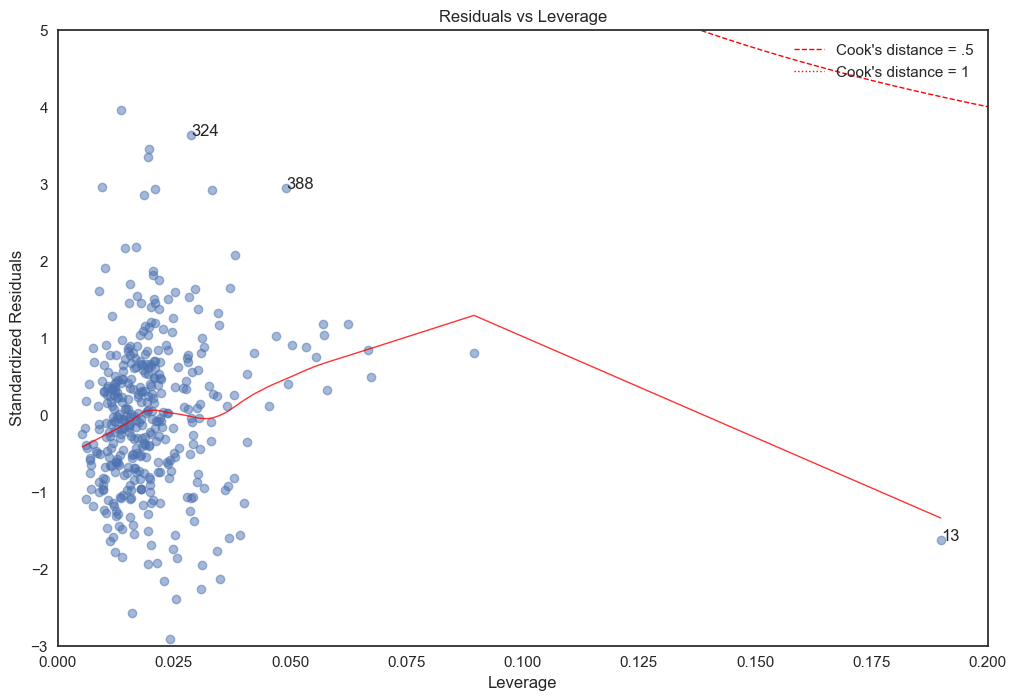

In [42]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(x=model_leverage, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right')

So, which pairs of variables would we expect to interact, both a priori (from our interpretation of the meaning of these variables) and from the pairs plot?

Perhaps horsepower and year? What would this mean? It would mean that, for different years, varying horsepower has different effect on mpg. It seems plausible. We could also interpret it in the reverse order: for different values of horsepower, does varying year have a different effect on mpg? For example, does the change in mpg when varying year (i.e., the derivative dmpg/dyear), differ when holding horsepower at either 130 or 160?

Let's find out.

In [44]:
reg = smf.ols('mpg ~ horsepower*year + displacement + weight + origin', auto_mpg).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     367.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          7.51e-156
Time:                        00:28:09   Log-Likelihood:                -987.81
No. Observations:                 392   AIC:                             1990.
Df Residuals:                     385   BIC:                             2017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -96.6688      9.667    -10.000      0.000    -115.675     -77.663
horsepower          0.7993      0.092      8.687      0.000       0.618       0.980
year                1.8179      0.128     14.221      0.000       1.567       2.069
horsepower:year    -0.0113      0.001     -8.977      0.000      -0.014      -0.009
displacement        0.0068      0.005      1.344      0.180      -0.003       0.017
weight             -0.0054      0.001    -10.170      0.000      -0.006      -0.004
origin              1.1866      0.253      4.684      0.000       0.688       1.685
==============================================================================
Omnibus:                       21.932   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.066
Skew:                           0.411   Prob(JB):                     6.60e-08
Kurtosis:                       4.161   Cond. No.                     5.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the value of the p-value of the coefficient of the interaction term between horsepower and year, it does seem like there is a statistically significant relationship between the response and horsepower:year.

With 7 factors, there will be a total of 21 interaction terms. For simplicity sake, we will exclude all the terms with cylinders and acceleration, leaving us with 10 interaction terms. Let's try to fit a model with these terms - a total of 15 terms.

In [48]:
model = 'mpg ~ displacement + horsepower + origin + weight + year \
               + displacement:horsepower + displacement:origin + displacement:weight + displacement:year \
               + horsepower:origin + horsepower:weight + horsepower:year + origin:weight + origin:year + weight:year'
reg = smf.ols(model, auto_mpg).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          1.09e-162
Time:                        00:35:08   Log-Likelihood:                -945.49
No. Observations:                 392   AIC:                             1923.
Df Residuals:                     376   BIC:                             1987.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -51.3746     26.175     -1.963      0.050    -102.843       0.093
displacement               -0.1818      0.120     -1.521      0.129      -0.417       0.053
horsepower                  0.9485      0.232      4.089      0.000       0.492       1.405
origin                     -3.0637      5.496     -0.557      0.578     -13.871       7.744
weight                     -0.0174      0.016     -1.115      0.265      -0.048       0.013
year                        1.3975      0.328      4.267      0.000       0.754       2.042
displacement:horsepower    -0.0001      0.000     -0.815      0.416      -0.000       0.000
displacement:origin         0.0282      0.013      2.172      0.030       0.003       0.054
displacement:weight      2.792e-05   5.99e-06      4.663      0.000    1.61e-05    3.97e-05
displacement:year           0.0010      0.001      0.710      0.478      -0.002       0.004
horsepower:origin          -0.0629      0.020     -3.104      0.002      -0.103      -0.023
horsepower:weight       -1.175e-05   1.77e-05     -0.664      0.507   -4.65e-05     2.3e-05
horsepower:year            -0.0114      0.003     -3.998      0.000      -0.017      -0.006
origin:weight               0.0014      0.001      1.200      0.231      -0.001       0.004
origin:year                 0.0322      0.069      0.464      0.643      -0.104       0.169
weight:year              7.438e-05      0.000      0.394      0.694      -0.000       0.000
==============================================================================
Omnibus:                       52.658   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.208
Skew:                           0.710   Prob(JB):                     9.61e-26
Kurtosis:                       5.244   Cond. No.                     1.81e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

These results indicate that the interactions that appear to be statistically significant are displacement:weight, horsepower:origin and horsepower:year. Interestingly, when these are considered the only first order terms that are statistically different are horsepower and year. By the hierarchy principle, we should nonetheless include all of the main effects.